In [34]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
input_tensor = Input(shape=(train_images.shape[1], train_images.shape[2],))
l1 = layers.Flatten()(input_tensor)
l2 = layers.Dense(784, activation='relu')(l1)
number = layers.Dense(10, activation='softmax')(l2)

model = Model(input_tensor, number)
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [tf.keras.callbacks.TensorBoard(log_dir=tensorboard_log_dir, 
                                            histogram_freq=1, embeddings_freq=1)]

model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 34s 569us/sample - loss: 4.6347 - accuracy: 0.9072
Epoch 2/5
60000/60000 [==============================] - 32s 539us/sample - loss: 0.7053 - accuracy: 0.9560
Epoch 3/5
60000/60000 [==============================] - 35s 579us/sample - loss: 0.5086 - accuracy: 0.9685
Epoch 4/5
60000/60000 [==============================] - 31s 510us/sample - loss: 0.4128 - accuracy: 0.9736
Epoch 5/5
60000/60000 [==============================] - 35s 584us/sample - loss: 0.3175 - accuracy: 0.9779


In [78]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 14s 1ms/sample - loss: 0.7490 - accuracy: 0.9712


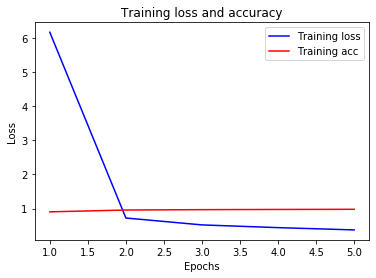

In [87]:
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, acc, 'r', label='Training acc')
plt.title('Training loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

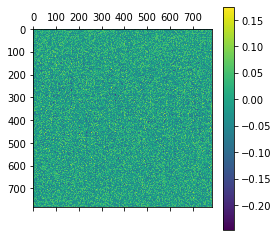

In [74]:
all_layer_weights = np.asanyarray(model.layers[2].get_weights()[0])
all_layer_weights_map = plt.matshow(a)
plt.colorbar(all_layer_weights_map)

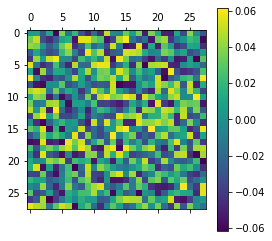

In [75]:
single_layer_weights = all_layer_weights[3].reshape(28, 28)
single_layer_weights_map = plt.matshow(single_layer_weights)
plt.colorbar(single_layer_weights_map)